<a href="https://colab.research.google.com/github/MohammadMahdiOmid/DeepLearning/blob/master/CIFAR10_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import library**

In [21]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Conv2D,MaxPooling2D,GlobalMaxPooling2D,BatchNormalization

import matplotlib.pyplot as plt
import seaborn as sb


**Load Data**

In [15]:
batch_size=32
data_augumentation=True
num_class=10

# Loading data from dataset and split it to train data and test data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# printing just for demonstration
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"x_train samples")
print(x_test.shape[0],"x_test samples")

x_train shape: (50000, 32, 32, 3)
50000 x_train samples
10000 x_test samples


**Convert class vector to binary matrix**


In [16]:
y_train=keras.utils.to_categorical(y_train, num_class)
y_test=keras.utils.to_categorical(y_test, num_class)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

**creating some models just for practic**

In [17]:
model= Sequential()

model.add(Conv2D(32,(3,3),kernel_initializer='random_normal',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3),kernel_initializer='random_normal',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3),kernel_initializer='random_normal',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48,(3,3),kernel_initializer='random_normal',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48,(3,3),kernel_initializer='random_normal',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_class))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_11 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 48)       

**Add optimizer**

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

**fit model**

In [19]:
model_fit=model.fit(x_train, y_train,batch_size=batch_size,epochs=45,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/45
1563/1563 [==============================] - 386s 246ms/step - loss: 1.8615 - accuracy: 0.3027 - val_loss: 1.7229 - val_accuracy: 0.3620
Epoch 2/45
1563/1563 [==============================] - 370s 237ms/step - loss: 1.4940 - accuracy: 0.4487 - val_loss: 1.5007 - val_accuracy: 0.4553
Epoch 3/45
1563/1563 [==============================] - 377s 241ms/step - loss: 1.3464 - accuracy: 0.5115 - val_loss: 1.3202 - val_accuracy: 0.5193
Epoch 4/45
1563/1563 [==============================] - 494s 316ms/step - loss: 1.2527 - accuracy: 0.5490 - val_loss: 1.2544 - val_accuracy: 0.5517
Epoch 5/45
1563/1563 [==============================] - 436s 279ms/step - loss: 1.1905 - accuracy: 0.5731 - val_loss: 1.1973 - val_accuracy: 0.5685
Epoch 6/45
1563/1563 [==============================] - 432s 276ms/step - loss: 1.1425 - accuracy: 0.5914 - val_loss: 1.1655 - val_accuracy: 0.5844
Epoch 7/45
1563/1563 [==============================] - 451s 288ms/step - loss: 1.0969 - accuracy: 0.6098 - val_

**Plotting**

plot accuracy between train data and validation

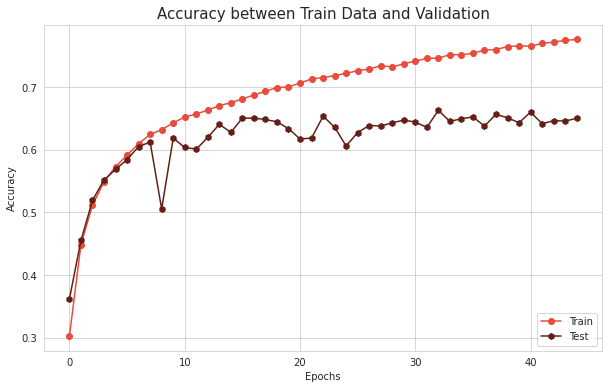

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(10,6))
sb.set_style('whitegrid')
plt.plot(model_fit.history['accuracy'],color='#E74C3C',marker='o')
plt.plot(model_fit.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy between Train Data and Validation',fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='lower right')
plt.show()
plt.savefig("Fig1.png")

plot loss between train data and validation

In [ ]:
plt.figure(figsize=(10,6))
sb.setstyle('whitegrid')
plt.plot(model_fit.history['loss'],color='#Purple',marker='o')
plt.plot(model_fit.history['val_loss'],color='#Orange',marker='h')
plt.title('Loss between Train Data and Validation',fontsize=15)
plt.xlable('Epochs')
plt.ylable('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

plot both of accuracy and loss

In [ ]:
plt.figure(figsize=(10,6))
sb.setstyle('whitegrid')
plt.plot(model_fit.history['accuracy'],color='#E74C3C',marker='o')
plt.plot(model_fit.history['val_accuracy'],color='#641E16',marker='h')
plt.plot(model_fit.history['loss'],color='#Purple',marker='o')
plt.plot(model_fit.history['val_loss'],color='#Orange',marker='h')

plt.title('Compare accuracy and loss ',fontsize=15)
plt.xlable('Epochs')
plt.ylable('Accuracy')
# plt.legend(['Train','Test'],loc='best')
plt.show()

**another model**

In [ ]:
model2=Sequential()

model2.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(32,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(48,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(128,(3,3),kernel_initializer='random_uniform',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))
model.add(Dense(num_class))
model.add(Activation('softmax'))
model.summary()

**Add optimizer**

In [ ]:
opt=keras.optimizers.Adamax(lr=0.001)
model2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

**Fit model**

In [ ]:
second_model_fit=model.fit(x_train, y_train,batch_size=500,epochs=100,validation_data=(x_test,y_test),shuffle=True)

**Plotting**

plot accuracy between train data and validation

In [ ]:
plt.figure(figsize=(10,6))
sb.setstyle('whitegrid')
plt.plot(second_model_fit.history['acc'],color='#E74C3C',marker='o')
plt.plot(second_model_fit.history['val_acc'],color='#641E16',marker='h')
plt.title('Accuracy between Train Data and Validation',fontsize=15)
plt.xlable('Epochs')
plt.ylable('Accuracy')
plt.legend(['Train','Test'],loc='lower right')
plt.show()

plot loss between train data and validation

In [ ]:
plt.figure(figsize=(10,6))
sb.setstyle('whitegrid')
plt.plot(second_model_fit.history['loss'],color='#Purple',marker='o')
plt.plot(second_model_fit.history['val_loss'],color='#Orange',marker='h')
plt.title('Loss between Train Data and Validation',fontsize=15)
plt.xlable('Epochs')
plt.ylable('Accuracy')
plt.legend(['Train','Test'],loc='best')
plt.show()

plot both of accuracy and loss

In [ ]:
plt.figure(figsize=(10,6))
sb.setstyle('whitegrid')
plt.plot(second_model_fit.history['acc'],color='#E74C3C',marker='o')
plt.plot(second_model_fit.history['val_acc'],color='#641E16',marker='h')
plt.plot(second_model_fit.history['loss'],color='#Purple',marker='o')
plt.plot(second_model_fit.history['val_loss'],color='#Orange',marker='h')

plt.title('Compare accuracy and loss ',fontsize=15)
plt.xlable('Epochs')
plt.ylable('Accuracy')
# plt.legend(['Train','Test'],loc='best')
plt.show()